## Installing uv

To start, you'll want to have uv installed:

https://docs.astral.sh/uv/getting-started/installation/


**Next, run this in the terminal, from the parent directory:**

    uv sync


Now you will have the kernel used to run this notebook

---

## Running the Required Servers

You need to run **three servers**, each in its own terminal:

- `central_server.py`
- `AS_server_AtomBlastTwin.py`
- `Ceos_server_twin.py`

### 1. Activate the Virtual Environment

`uv` should have created a `.venv` directory for you.

**On macOS / Linux:**

    source .venv/bin/activate

**On Windows (likely):**

    source .venv/Scripts/activate

You should now see the environment activated.

---

### 2. Start the Servers

**Terminal 1 — Central Server**

    source .venv/bin/activate
    python -m asyncroscopy.servers.protocols.central_server

**Terminal 2 — Atom Resolution Simulation Server**

    source .venv/bin/activate
    python -m asyncroscopy.servers.AS_server_AtomBlastTwin

**Terminal 3 — CEOS Twin Server**

    source .venv/bin/activate
    python -m asyncroscopy.servers.Ceos_server_twin

---

You're now ready to run this notebook! 🚀

In [1]:
import sys
import ast
sys.path.insert(0, '../')
from asyncroscopy.clients.notebook_client import NotebookClient
import matplotlib.pyplot as plt

import pyTEMlib
from pyTEMlib import probe_tools as pt

%matplotlib ipympl

In [2]:
# Source - https://stackoverflow.com/a
# Posted by Nick Sweet
# Retrieved 2025-12-16, License - CC BY-SA 3.0

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)


### Connections:

In [3]:
# Connect the Client to the central (async) server
tem = NotebookClient.connect(host='localhost',port=9000)

# Tell the central server address of all connected instruments
routing_table= {"AS": ("localhost", 9001),
                "Gatan": ("localhost", 9002),
                "Ceos": ("localhost", 9003),
                "Preacquired_AS": ("localhost", 9004)}
tem.send_command('Central',"set_routing_table", routing_table)

# ConnectionResetError: [Errno 54] Connection reset by peer 
# in terminal, type:
# lsof -i :9000
# then kill PIDs on that port


Connecting to central server localhost:9000...
Connected to central server.


'[Central] Routing table updated'

In [4]:
# connect to the AutoScript computer and initialize microscope
tem.send_command('AS',command='connect_AS',args={'host':'localhost','port':9001})
tem.send_command(destination = 'Ceos', command = 'getInfo', args = {})

'CEOS Digital Twin Server'

### Help commands:

In [5]:
# Now that we're routed to all instruments,
# let's take an inventory of commands available on each instrument
cmds = tem.send_command('AS', 'discover_commands')
print(cmds)

["blank_beam", "connect_AS", "connectionLost", "connectionMade", "dataReceived", "disconnect", "discover_commands", "get_atom_count", "get_dose_map", "get_help", "get_scanned_image", "get_stage", "get_status", "lengthLimitExceeded", "load_sample", "logPrefix", "makeConnection", "pauseProducing", "place_beam", "reset_sample", "resumeProducing", "sendString", "set_beam_current", "set_fov", "stopProducing", "stringReceived", "unblank_beam"]


### Setting the aberrations from known values:

In [6]:
aberrations = pt.get_target_aberrations("Spectra300", 60000)
tem.send_command(destination = 'Ceos', command = 'uploadAberrations', args = aberrations)
pt.print_aberrations(aberrations)

In [27]:
tem.send_command('AS', 'load_sample')


'Loaded sample with 3600 atoms. Dose map initialized.'

### Get an image:

simulated with pystemsim inside the AS_server_SimAtomRes (working with the Ceos server)

'Current atom count: 3600'

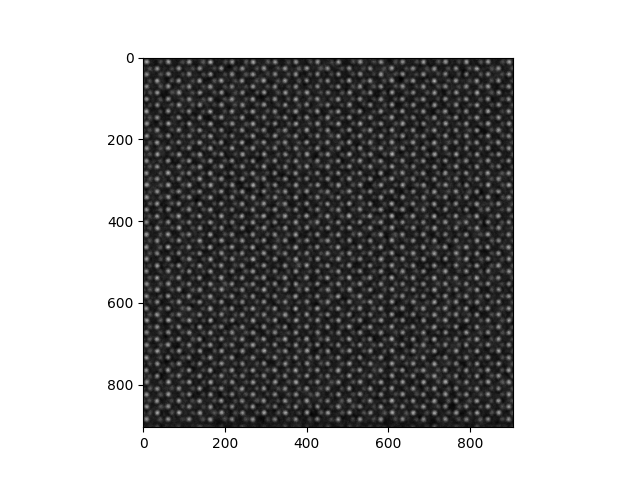

In [29]:
image_args = {'scanning_detector':'HAADF',
                'size':512,
                'dwell_time':10e-6}

beam_current = 1
tem.send_command('AS', 'set_beam_current', {'current':beam_current}) # pA
img = tem.send_command('AS','get_scanned_image', image_args)

plt.figure()
plt.imshow(img, cmap="gray")
tem.send_command('AS', 'get_atom_count', {})

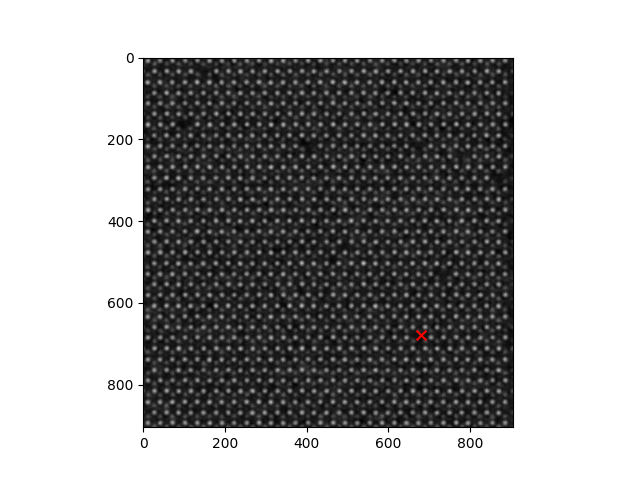

In [38]:
# Position beam and expose
beam_pos = [0.75, 0.75]

beam_current = 100
tem.send_command('AS', 'place_beam', {'x': beam_pos[1], 'y': beam_pos[0]})
tem.send_command('AS', 'set_beam_current', {'current': beam_current})
tem.send_command('AS', 'unblank_beam', {'duration': 1}) # seconds

beam_current = 1
tem.send_command('AS', 'set_beam_current', {'current':beam_current}) # pA
img = tem.send_command('AS','get_scanned_image', image_args)

plt.figure()
plt.imshow(img.T, cmap="gray")
plt.scatter(beam_pos[1] * img.shape[1], beam_pos[0] * img.shape[0], color='red', s=50, marker='x')


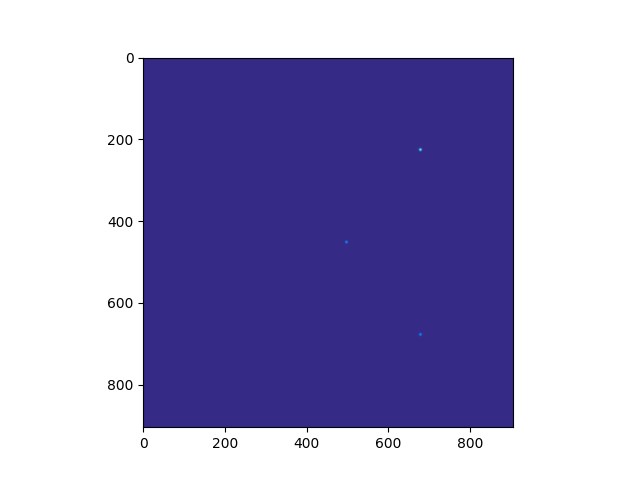

In [39]:
dose_map = tem.send_command('AS', 'get_dose_map', {})

plt.figure()
plt.imshow(dose_map, cmap=parula_map, vmin=0)